M.Loshanan

190363X

https://github.com/Loshanan/Image-processing

In [150]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

In [151]:
def random_points(data, n):
    #return n random points from data
    num = 0
    sample = []
    while num < n:
        index = np.random.randint(len(data))
        x = data[index][0]
        y = data[index][1]
        if (x, y) not in sample:
            sample.append((x, y))
            num += 1
    return sample

In [152]:
def circle_param(data):
    #return circle parameters from sample
    pt1 = data[0]
    pt2 = data[1]
    pt3 = data[2]

    A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
    B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
    inv_A = linalg.inv(A)
    a, b = np.dot(inv_A, B) / 2
    a, b = a[0], b[0]
    r = np.sqrt((a - pt1[0])**2 + (b - pt1[1])**2)
    return (a, b, r)

In [153]:
def Inliers_and_distance(circ, data, threshold):
    x_data = data[:, 0]
    y_data = data[:, 1]
    a = circ[0]
    b = circ[1]
    r = circ[2]
    tot_dist = 0
    inliers = []
    for i in range(len(x_data)):
        dist = np.sqrt((x_data[i] - a)**2 + (y_data[i] - b)**2)
        if abs(dist - r) <= threshold:
            inliers.append([x_data[i], y_data[i]])
            tot_dist += abs(dist - r)
    return inliers, tot_dist

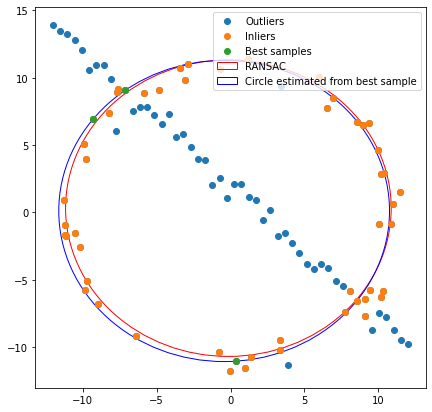

In [154]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
# np . random. seed ( 0 )
N = 100
half_n = N//2
R = 10
S = R /16
t = np . random. uniform(0 , 2*np . pi , half_n )
n = s*np . random. randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random. randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(X[:,0], X[:, 1], 'o', label='Outliers')

x_data = X[:, 0]
y_data = X[:, 1]
iter_num = 35
inlier_threshold = R/8
inlier_count_threshold = 50
best_model = [0, 0, 999999, []]

for i in range(iter_num):
    sample = random_points(X, 3)
    first = circle_param(sample)  # calculate circle parameters from three points
    if abs(R - first[2]) > 1.5*R: continue    #eliminate larger circles
    inliers, tot_dist = Inliers_and_distance(first, X, inlier_threshold)
    if len(inliers) < inlier_count_threshold: continue
    inlier_sample = random_points(inliers, 3)  # get three points from inliers
    circle = circle_param(inlier_sample)  # calculate circle parameters from three inlier points
    inliers, tot_dist = Inliers_and_distance(circle, X, inlier_threshold)  #calculate new inliers and total absolute distance
    if len(inliers) < inlier_count_threshold: continue   #if inlier count is less start from beginning
    #if same amount of inliers make the best model with the circle that has less absolute distance
    if len(best_model[-1]) < len(inliers):
        best_model = [circle, first, sample, toal_distance, inliers]
    elif len(best_model[-1]) == len(inliers):
        if best_model[3] > tot_dist:
            best_model = [circle, first, sample, tot_dist, inliers]
if len(best_model[-1]) == 0:
    print("No best model found")
else:
    inliers = np.array(best_model[-1])
    ax.plot(inliers[:, 0], inliers[:, 1], 'o', label='Inliers')
    best_samples = np.array(best_model[2])
    ax.plot(best_samples[:,0], best_samples[:, 1], 'o', label='Best samples')
    a, b, r = best_model[0][0], best_model[0][1], best_model[0][2]
    circle = Circle((a, b), radius=r, color='r', fc='y', fill=False, label='RANSAC')
    ax.add_patch(circle)
    a, b, r = best_model[1][0], best_model[1][1], best_model[1][2]
    init_circle = Circle((a, b), radius=r, color='b', fc='y', fill=False, label='Circle estimated from best sample')
    ax.add_patch(init_circle)
ax.legend();

In [155]:
def click(event, x, y, flags, params):
    #function for getting co-ordinates by mouse click
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)

In [156]:
def superimpose(im_src, im_dst, pts_src, pts_dst):
    #function to superimpose
    h, stat = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))
    return cv.add(im_out, im_dst)

23   574
34   210
400   294
421   558
546   313
550   258
610   257
611   303
(128, 255, 3)
(400, 800, 3)


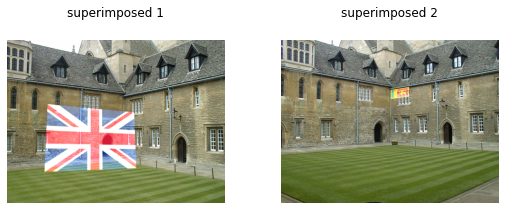

In [160]:
#2)

dist1 = cv.imread(r'003.jpg',cv.IMREAD_COLOR)
assert dst1 is not None
sorc1 = cv.imread(r'flag_UK.png',cv.IMREAD_ANYCOLOR)
assert src1 is not None
dist2 = cv.imread(r'001.jpg',cv.IMREAD_COLOR)
assert dst2 is not None
sorc2 = cv.imread(r'flag_lanka.png',cv.IMREAD_ANYCOLOR)
assert src2 is not None

#4 corners from destination image
cv.imshow('image', dst1)
cv.setMouseCallback('image', click)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('image', dst2)
cv.setMouseCallback('image', click)
cv.waitKey(0)
cv.destroyAllWindows()

# Four corners of the book in destination image.
#mouse click this order: (0,0), (0,1), (1,1), (1,0)
pts_dist1 = np.array([[191, 306], [596, 344], [606, 603], [177, 620]])
pts_dist2 = np.array([[515, 238], [1022, 156],  [1020, 506], [516, 482]])

print(sorc1.shape)
print(sorc2.shape)

pts_sorc1 = np.array([[0, 0], [254, 0], [254, 127], [0, 127]])
pts_sorc2 = np.array([[0, 0], [3499, 0], [3499, 2329], [0, 2329]])

#superimposed image
superimpos_1 = superimpose(sorc1, dist1, pts_sorc1, pts_dist1)
superimpos_2 = superimpose(sorc2, dist2, pts_sorc2, pts_dist2)

fig, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].imshow(cv.cvtColor(superimpos_1, cv.COLOR_BGR2RGB))
ax[0].title.set_text('superimposed 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(cv.cvtColor(superimpos_2, cv.COLOR_BGR2RGB))
ax[1].title.set_text('superimposed 2')
ax[1].axis('off')
ax[1].xaxis.tick_top()


In [158]:
def homogrpahy(src_img, dst_img):
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, desc1 = sift.detectAndCompute(sorc_img, None)
    kp2, desc2 = sift.detectAndCompute(dist_img, None)
    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_parameters = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_parameters = dict(checks = 50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    # print(len(good))
    sorc_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dist_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 0.95)
    return H
def matchSIFT(img1, img2):
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, desc1 = sift.detectAndCompute(img1, None)
    kp2, desc2 = sift.detectAndCompute(img2, None)
    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_parameters = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_parameters = dict(checks = 50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_parameters, search_parameters)
    matches = flann.knnMatch(desc1, desc2, k = 2)
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i] = [1,0]
    draw_params = dict(matchColor = (0, 255, 0),
                    singlePointColor = (255, 0, 0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)             
    img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(img3, cmap = 'gray', vmin = 0, vmax = 255)
    ax.title.set_text('features matched')
    ax.axis('off')
    ax.xaxis.tick_top()
    
    

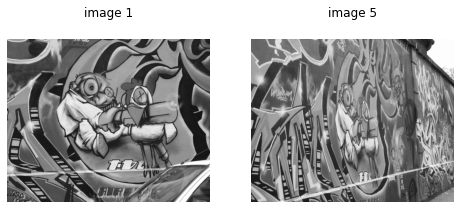

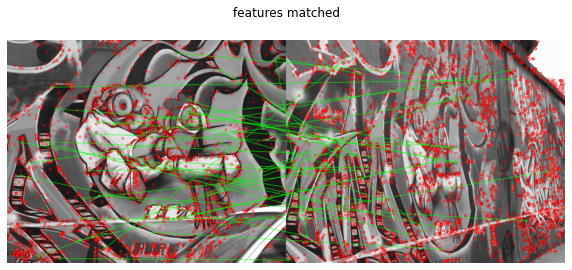

In [159]:
# Q3
im1 = cv.imread(r'img1.ppm', cv.IMREAD_GRAYSCALE)
assert img1 is not None
im5 = cv.imread(r'img5.ppm', cv.IMREAD_GRAYSCALE)
assert img5 is not None
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(im1, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].title.set_text('image 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()
ax[1].imshow(im5, cmap = 'gray', vmin =0, vmax=255)
ax[1].title.set_text('image 5')
ax[1].axis('off')
ax[1].xaxis.tick_top()
matchSIFT(im1, im5)